**Enhancement Citra Menggunakan High Pass Filter (HPF) dalam Domain Frekuensi**

---

### 1. Konsep High Pass Filter (HPF)

High Pass Filter (HPF) digunakan dalam domain frekuensi untuk mempertahankan komponen frekuensi tinggi dan menekan komponen frekuensi rendah. Tujuan utama HPF adalah menonjolkan tepi dan detail halus dari citra.

**Manfaat HPF**:
- Menonjolkan batas objek dan detail halus
- Digunakan dalam edge detection dan penajaman citra

Penerapan dilakukan dengan transformasi Fourier, mengalikan spektrum frekuensi dengan filter HPF, kemudian melakukan inverse transform.

---

### 2. Jenis-Jenis HPF dan Rumus

#### a. Ideal High Pass Filter (IHPF)
Membuang semua komponen frekuensi rendah secara keras.
$$ H(u,v) = \begin{cases} 0, & \text{jika } D(u,v) \leq D_0 \\ 1, & \text{jika } D(u,v) > D_0 \end{cases} $$

#### b. Butterworth High Pass Filter (BHPF)
Transisi halus antar frekuensi rendah dan tinggi.
$$ H(u,v) = \frac{1}{1 + (\frac{D_0}{D(u,v)})^{2n}} $$

#### c. Gaussian High Pass Filter (GHPF)
Transisi paling halus dan stabil.
$$ H(u,v) = 1 - e^{-\frac{D^2(u,v)}{2D_0^2}} $$

Dimana:
- \[ D(u,v) \]: Jarak Euclidean dari pusat frekuensi
- \[ Do \]: Frekuensi cutoff
- \[ n \]: Order dari Butterworth

---

### 3. Implementasi Python

#### a. Fungsi HPF
```python
import numpy as np

def create_distance_matrix(shape):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    return D

def ideal_hpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.ones_like(D)
    H[D <= D0] = 0
    return H

def butterworth_hpf(shape, D0, n):
    D = create_distance_matrix(shape)
    H = 1 / (1 + (D0 / D)**(2 * n))
    return H

def gaussian_hpf(shape, D0):
    D = create_distance_matrix(shape)
    H = 1 - np.exp(-(D**2) / (2 * D0**2))
    return H
```

#### b. Aplikasi Filter
```python
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

D0 = 30
H = gaussian_hpf(img.shape, D0)
G_shift = F_shift * H
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))
```

#### c. Visualisasi
```python
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian HPF)'), plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Hasil HPF (Gaussian)'), plt.axis('off')
plt.show()
```

---

### 4. Eksperimen Parameterisasi dan Perbandingan

#### a. Eksperimen dengan D0
```python
for D0 in [10, 30, 60]:
    H = gaussian_hpf(img.shape, D0)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Gaussian HPF (D0={D0})')
    plt.axis('off')
    plt.show()
```

#### b. Eksperimen dengan Orde Butterworth
```python
for n in [1, 2, 4]:
    H = butterworth_hpf(img.shape, 30, n)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Butterworth HPF (n={n})')
    plt.axis('off')
    plt.show()
```

---

### 5. Kesimpulan

High Pass Filter dalam domain frekuensi sangat efektif untuk menonjolkan fitur detail dan tepi dalam citra. Tiga jenis filter HPF utama—Ideal, Butterworth, dan Gaussian—memiliki sifat karakteristik berbeda dalam menyeleksi frekuensi tinggi. Gaussian HPF memberikan transisi paling halus dan stabil. Dengan pengaturan parameter yang tepat seperti cutoff frequency \( Do \) dan orde \( n \), kita bisa menyesuaikan efek penajaman terhadap berbagai tipe citra dan kebutuhan aplikasi.



# Implementasi Code

## HPF Function

In [16]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
def create_distance_matrix(shape):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    return D

def ideal_hpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.ones_like(D)
    H[D <= D0] = 0
    return H

def butterworth_hpf(shape, D0, n):
    D = create_distance_matrix(shape)
    H = 1 / (1 + (D0 / D)**(2 * n))
    return H

def gaussian_hpf(shape, D0):
    D = create_distance_matrix(shape)
    H = 1 - np.exp(-(D**2) / (2 * D0**2))
    return H

## Filter

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/rumah.webp', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

D0 = 30
H = gaussian_hpf(img.shape, D0)
G_shift = F_shift * H
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

## Visualization

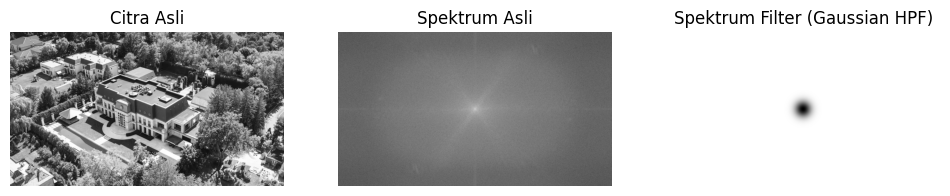

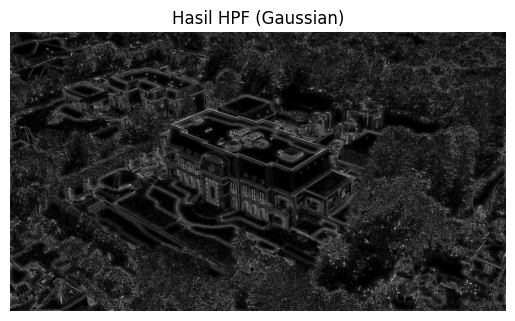

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian HPF)'), plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Hasil HPF (Gaussian)'), plt.axis('off')
plt.show()

# Eksperimen Parameterisasi dan Perbandingan

## ideal_hpf Experiment with D0

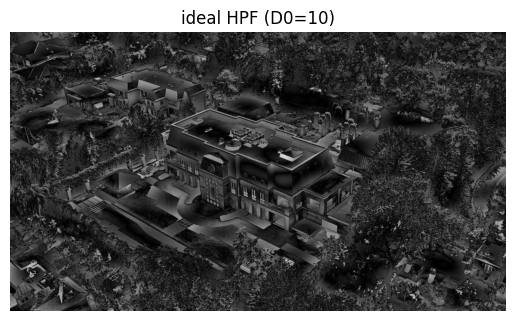

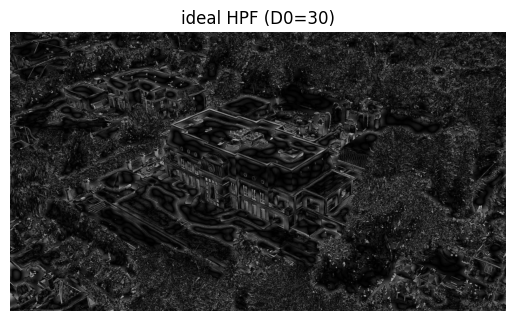

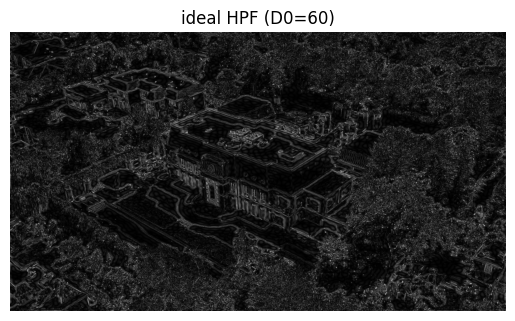

In [10]:
for D0 in [10, 30, 60]:
    H = ideal_hpf(img.shape, D0)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'ideal HPF (D0={D0})')
    plt.axis('off')
    plt.show()

## Butterworth experiment with D0 with n = 15

<ipython-input-16-a7acec03a0cd>:19: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


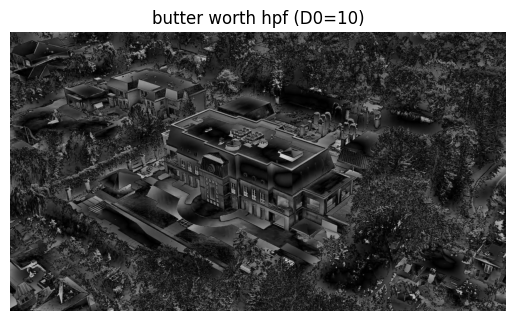

<ipython-input-20-cafd82fdf752>:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_val = psnr(ref, img_filtered)


PSNR: 7.782292556673244


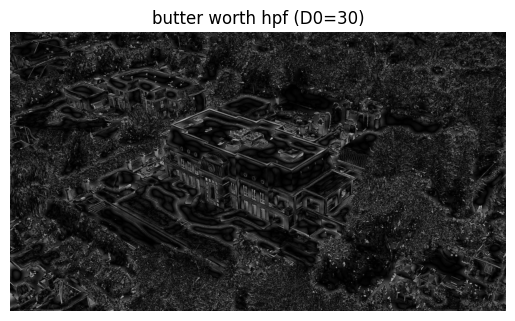

PSNR: 7.09400919691088


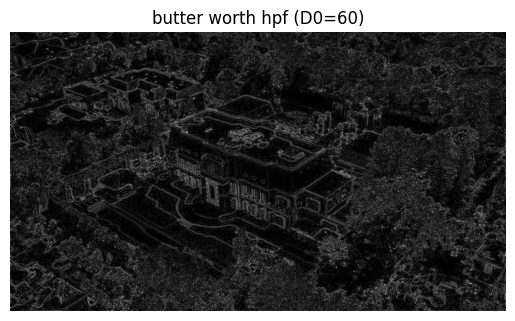

PSNR: 6.724468170143156


In [20]:
n = 15
for D0 in [10, 30, 60]:
    H = butterworth_hpf(img.shape, D0, n)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'butter worth hpf (D0={D0})')
    plt.axis('off')
    plt.show()
    ref = img  # citra referensi
    psnr_val = psnr(ref, img_filtered)
    print("PSNR:", psnr_val)

## Eksperimen dengan Orde Butterworth dengan D0 10

<ipython-input-16-a7acec03a0cd>:19: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


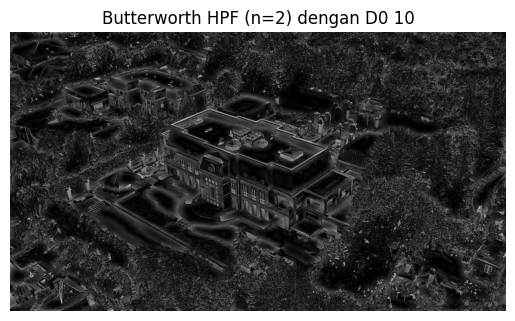

<ipython-input-19-0c95a8a9bcf5>:12: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_val = psnr(ref, img_filtered)


PSNR: 7.286602708176362


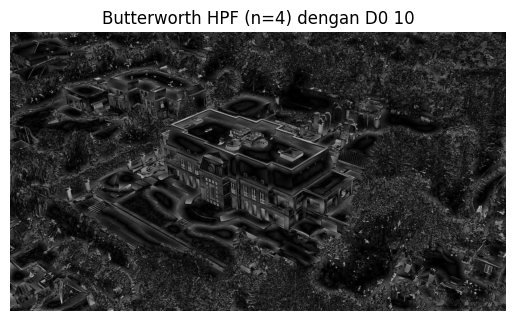

PSNR: 7.323071473476924


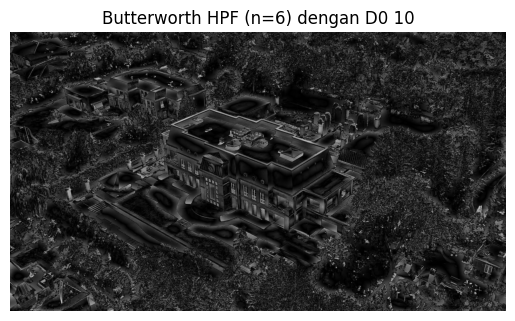

PSNR: 7.339687182945694


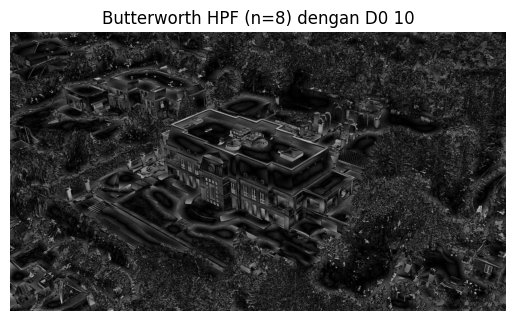

PSNR: 7.348110259019829


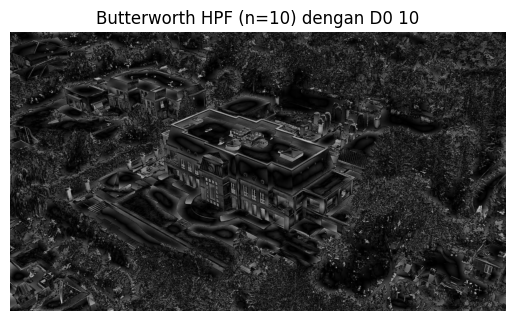

PSNR: 7.3530004809028835


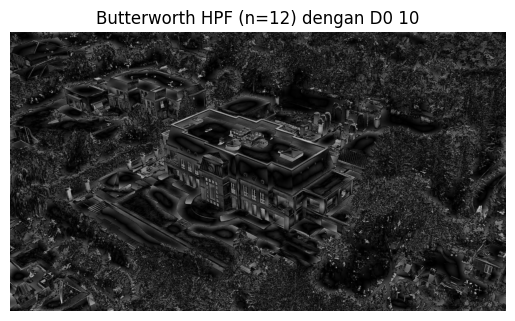

PSNR: 7.356133924161835


In [19]:
for n in range(2, 14, 2):
    H = butterworth_hpf(img.shape, 19, n)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Butterworth HPF (n={n}) dengan D0 10' )
    plt.axis('off')
    plt.show()
    ref = img  # citra referensi
    psnr_val = psnr(ref, img_filtered)
    print("PSNR:", psnr_val)

## Gausian HPF with various D0

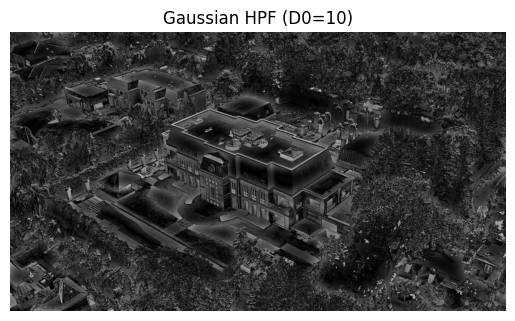

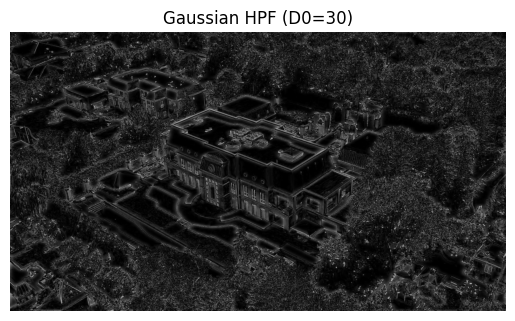

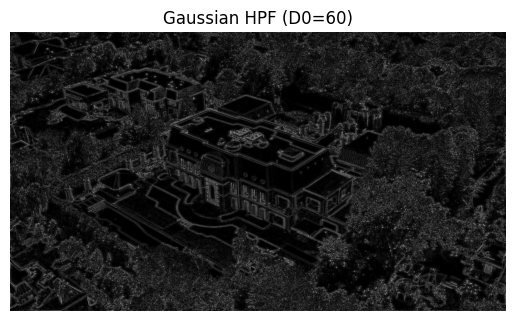

In [24]:
for D0 in [10, 30, 60]:
    H = gaussian_hpf(img.shape, D0)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Gaussian HPF (D0={D0})')
    plt.axis('off')
    plt.show()